# AutoGen Notes

## Agents

The following preset agents are available:

-   [`UserProxyAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.UserProxyAgent "autogen_agentchat.agents.UserProxyAgent"): An agent that takes user input returns it as responses.
    
-   [`CodeExecutorAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.CodeExecutorAgent "autogen_agentchat.agents.CodeExecutorAgent"): An agent that can execute code.
    
-   [`OpenAIAssistantAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.openai.html#autogen_ext.agents.openai.OpenAIAssistantAgent "autogen_ext.agents.openai.OpenAIAssistantAgent"): An agent that is backed by an OpenAI Assistant, with ability to use custom tools.
    
-   [`MultimodalWebSurfer`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.web_surfer.html#autogen_ext.agents.web_surfer.MultimodalWebSurfer "autogen_ext.agents.web_surfer.MultimodalWebSurfer"): A multi-modal agent that can search the web and visit web pages for information.
    
-   [`FileSurfer`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.file_surfer.html#autogen_ext.agents.file_surfer.FileSurfer "autogen_ext.agents.file_surfer.FileSurfer"): An agent that can search and browse local files for information.
    
-   [`VideoSurfer`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.agents.video_surfer.html#autogen_ext.agents.video_surfer.VideoSurfer "autogen_ext.agents.video_surfer.VideoSurfer"): An agent that can watch videos for information.

### Autogen Agents
New platforms like LangGraph, AutoGen[^4], and CrewAI are now leading the way in this ongoing evolution. 

- LangGraph provides a framework for building stateful, multi-agent systems that can handle complex workflows and integrate seamlessly with various tools, enhancing the reliability and efficiency of AI agents. 
- AutoGen offers advanced capabilities for generating AI-driven content and automating tasks with greater precision and adaptability, leveraging the latest advancements in machine learning and natural language processing. 
- CrewAI focuses on collaborative AI, enabling multiple agents to work together on intricate projects, optimizing resource utilization, and improving overall performance. 

These platforms, which are open source, represent the next step in the journey of generative AI, building on past experiences to create more resilient and versatile AI agents[^5].

Load the OpenAI keys

In [2]:
%load_ext dotenv
%dotenv ../../.env

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient
import os

Define the tool that search for the web which is a mock function for this example.

In [12]:
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."

AssistantAgent[^1] is a “kitchen sink” agent for prototyping and educational purpose.

In [13]:
# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4.1-nano",
    api_key=os.getenv("OPENAI_API_KEY")
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)

In [14]:
import pprint
# Use asyncio.run(agent.run(...)) when running in a script.
result = await agent.run(task="Find information on AutoGen")
pprint.pprint(result.messages)

[TextMessage(source='user', models_usage=None, metadata={}, content='Find information on AutoGen', type='TextMessage'),
 ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=61, completion_tokens=47), metadata={}, content=[FunctionCall(id='call_X5g3mm2w63Cj2IFXCmffcOJV', arguments='{"query": "AutoGen"}', name='web_search'), FunctionCall(id='call_eKOtjqI5pZgPA6CaBmGFtBhR', arguments='{"query": "AutoGen software"}', name='web_search')], type='ToolCallRequestEvent'),
 ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_X5g3mm2w63Cj2IFXCmffcOJV', is_error=False), FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_eKOtjqI5pZgPA6CaBmGFtBhR', is_error=False)], type='ToolCallExecutionEvent'),
 ToolCallSumm

Multi-modal input


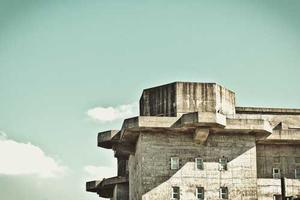

In [15]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [16]:
# Use asyncio.run(...) when running in a script.
result = await agent.run(task=multi_modal_message)
print(result.messages[-1].content)  # type: ignore

The image shows the upper part of a concrete building or structure against a light sky with a few clouds. The architecture appears industrial or utilitarian, with prominent concrete elements and a somewhat weathered appearance. The building has a flat roof with some structural extensions or ledges.


### Streaming Messages

In [17]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.run_stream(task="Find information on AutoGen"):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.run_stream(task="Find information on AutoGen"),
        output_stats=True,  # Enable stats printing.
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- TextMessage (user) ----------
Find information on AutoGen
---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_RXjomDPKANik2V0tpx4V0mYs', arguments='{"query": "AutoGen"}', name='web_search'), FunctionCall(id='call_uRinQbkEFuHZmJ1TW6wLciJA', arguments='{"query": "AutoGen software"}', name='web_search')]
[Prompt tokens: 401, Completion tokens: 47]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_RXjomDPKANik2V0tpx4V0mYs', is_error=False), FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='call_uRinQbkEFuHZmJ1TW6wLciJA', is_error=False)]
---------- ToolCallSummaryMessage (assistant) ----------
AutoGen is a programming framework for building multi-agent applications.
AutoGen is a programming framework for building multi-a

### Tools
All the available tools under the `autogen_ext.tools` namespace. For example, you can find the following tools:

-   [`graphrag`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.graphrag.html#module-autogen_ext.tools.graphrag "autogen_ext.tools.graphrag"): Tools for using GraphRAG index.
    
-   [`http`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.http.html#module-autogen_ext.tools.http "autogen_ext.tools.http"): Tools for making HTTP requests.
    
-   [`langchain`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.langchain.html#module-autogen_ext.tools.langchain "autogen_ext.tools.langchain"): Adaptor for using LangChain tools.
    
-   [`mcp`](https://microsoft.github.io/autogen/stable/reference/python/autogen_ext.tools.mcp.html#module-autogen_ext.tools.mcp "autogen_ext.tools.mcp"): Tools and workbench for using Model Chat Protocol (MCP) servers.

> Any `BaseChatAgent` can be used as a tool by wrapping it in a `AgentTool`. This allows for a dynamic, model-driven multi-agent workflow where the agent can call other agents as tools to solve tasks.


#### Function Tool
Modern LLMs can now accept a list of available tool schemas (descriptions of tools and their arguments) and generate a tool call message. This capability is known as **Tool Calling**[^2] or **Function Calling**[^3] and is becoming a popular pattern in building intelligent agent-based applications.

In [18]:
from autogen_core.tools import FunctionTool


# Define a tool using a Python function.
async def web_search_func(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# This step is automatically performed inside the AssistantAgent if the tool is a Python function.
web_search_function_tool = FunctionTool(web_search_func, description="Find information on the web")
# The schema is provided to the model during AssistantAgent's on_messages call.
web_search_function_tool.schema

{'name': 'web_search_func',
 'description': 'Find information on the web',
 'parameters': {'type': 'object',
  'properties': {'query': {'description': 'query',
    'title': 'Query',
    'type': 'string'}},
  'required': ['query'],
  'additionalProperties': False},
 'strict': False}

For LangChain first install the ` uv add langchain-experimental`. Use the `PythonAstREPLTool` from the langchain package to create a tool that allows you to interact with a Pandas DataFrame.

In [19]:
import asyncio
import pandas as pd
from langchain_experimental.tools.python.tool import PythonAstREPLTool
from autogen_ext.tools.langchain import LangChainToolAdapter
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken


async def main() -> None:
    df = pd.read_csv(
        "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv") 
    tool = LangChainToolAdapter(PythonAstREPLTool(locals={"df": df}))
    model_client = OpenAIChatCompletionClient(model="gpt-4o-mini")
    agent = AssistantAgent(
        "assistant",
        tools=[tool],
        model_client=model_client,
        system_message="Use the `df` variable to access the dataset.",
    )
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="What's the average age of the passengers?", source="user")], CancellationToken()
        )
    )


await main()


---------- ToolCallRequestEvent (assistant) ----------
[FunctionCall(id='call_EraSPy5VzP3Car4pgJE052UV', arguments='{"query":"df[\'Age\'].mean()"}', name='python_repl_ast')]
---------- ToolCallExecutionEvent (assistant) ----------
[FunctionExecutionResult(content='29.69911764705882', name='python_repl_ast', call_id='call_EraSPy5VzP3Car4pgJE052UV', is_error=False)]
---------- assistant ----------
29.69911764705882


#### Model Context Protocol (MCP) Workbench

First install the package `uv add autogen-ext[mcp]`.

In [22]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_ext.tools.mcp import McpWorkbench, StdioServerParams

# Get the fetch tool from mcp-server-fetch.
fetch_mcp_server = StdioServerParams(command="uvx", args=["mcp-server-fetch"])

# Create an MCP workbench which provides a session to the mcp server.
async with McpWorkbench(fetch_mcp_server) as workbench:  # type: ignore
    # Create an agent that can use the fetch tool.
    model_client = OpenAIChatCompletionClient(model="gpt-4.1-nano")
    fetch_agent = AssistantAgent(
        name="fetcher", model_client=model_client, workbench=workbench, reflect_on_tool_use=True
    )

    # Let the agent fetch the content of a URL and summarize it.
    result = await fetch_agent.run(
        task="Summarize the content of https://ojitha.github.io/aws/ai/2025/08/03/AWSS3AccessPoints.html")
    assert isinstance(result.messages[-1], TextMessage)
    print(result.messages[-1].content)

    # Close the connection to the model client.

    await model_client.close()

The article discusses AWS S3 Access Points and VPC Endpoints, emphasizing their roles in secure, scalable, and manageable cloud storage and networking.  

**S3 Access Points** are network endpoints linked to an S3 bucket, allowing tailored access control policies for different applications, teams, or users. They simplify permissions management by enabling discrete policies per application, enhance security by restricting access to specific VPCs, and facilitate cross-account sharing. Each access point supports up to 10,000 configurations, making it ideal for complex, shared datasets.

**VPC Endpoints** provide private connectivity between a Virtual Private Cloud (VPC) and AWS services like S3, eliminating the need for public internet routes. There are two primary types:  
- **Interface Endpoints** (powered by AWS PrivateLink, supporting many AWS services via ENIs), and  
- **Gateway Endpoints** (using route tables for specific AWS services).

Both enhance security, reduce latency, and i

#### Structured Output
Structured output allows models to return structured JSON text with pre-defined schema provided by the application. Structured output is also useful for incorporating Chain-of-Thought reasoning in the agent’s responses.

In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import StructuredMessage
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

from typing import Literal

from pydantic import BaseModel


# The response format for the agent as a Pydantic base model.
class AgentResponse(BaseModel):
    thoughts: str
    response: Literal["happy", "sad", "neutral"]


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(model="gpt-4o-mini")
agent = AssistantAgent(
    "assistant",
    model_client=model_client,
    system_message="Categorize the input as happy, sad, or neutral following the JSON format.",
    # Define the output content type of the agent.
    output_content_type=AgentResponse,
)

result = await Console(agent.run_stream(task="I am happy."))

# Check the last message in the result, validate its type, and print the thoughts and response.
assert isinstance(result.messages[-1], StructuredMessage)
assert isinstance(result.messages[-1].content, AgentResponse)
print("Thought: ", result.messages[-1].content.thoughts)
print("Response: ", result.messages[-1].content.response)
await model_client.close()


---------- TextMessage (user) ----------
I am happy.
---------- StructuredMessage[AgentResponse] (assistant) ----------
{"thoughts":"The user explicitly states they are happy, which indicates a positive emotional state.","response":"happy"}
Thought:  The user explicitly states they are happy, which indicates a positive emotional state.
Response:  happy


#### Streaming Tokens
You can stream the tokens generated by the model client by setting `model_client_stream=True`. This will cause the agent to yield [`ModelClientStreamingChunkEvent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.ModelClientStreamingChunkEvent "autogen_agentchat.messages.ModelClientStreamingChunkEvent") messages in [`run_stream()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.run_stream "autogen_agentchat.agents.BaseChatAgent.run_stream").

You can see the streaming chunks in the output bellow.

In [ ]:
model_client = OpenAIChatCompletionClient(model="gpt-4o-mini")

streaming_assistant = AssistantAgent(
    name="assistant",
    model_client=model_client,
    system_message="You are a helpful assistant.",
    model_client_stream=True,  # Enable streaming tokens.
)

# Use an async function and asyncio.run() in a script.
async for message in streaming_assistant.run_stream(task="Name two cities in South America"):  # type: ignore
    print(message)


source='user' models_usage=None metadata={} content='Name two cities in South America' type='TextMessage'
source='assistant' models_usage=None metadata={} content='Two' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' cities' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' in' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' South' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' America' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' are' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' Buenos' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' Aires' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' (' type

### Using Model Context

[`AssistantAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent "autogen_agentchat.agents.AssistantAgent") has a `model_context` parameter that can be used to pass in a [`ChatCompletionContext`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.ChatCompletionContext "autogen_core.model_context.ChatCompletionContext") object. This allows the agent to use different model contexts, such as [`BufferedChatCompletionContext`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.BufferedChatCompletionContext "autogen_core.model_context.BufferedChatCompletionContext") to limit the context sent to the model.

> By default, [`AssistantAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent "autogen_agentchat.agents.AssistantAgent") uses the [`UnboundedChatCompletionContext`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.UnboundedChatCompletionContext "autogen_core.model_context.UnboundedChatCompletionContext") which sends the full conversation history to the model. To limit the context to the last `n` messages, you can use the [`BufferedChatCompletionContext`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.BufferedChatCompletionContext "autogen_core.model_context.BufferedChatCompletionContext"). To limit the context by token count, you can use the [`TokenLimitedChatCompletionContext`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.model_context.html#autogen_core.model_context.TokenLimitedChatCompletionContext "autogen_core.model_context.TokenLimitedChatCompletionContext").




In [21]:
from autogen_core.model_context import BufferedChatCompletionContext

# Create an agent that uses only the last 5 messages in the context to generate responses.
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
    model_context=BufferedChatCompletionContext(buffer_size=5),  # Only use the last 5 messages in the context.
)


## Teams

A **multi-agent team** is a group of agents that work together to achieve a common goal. Teams are for complex tasks that require collaboration and diverse expertise. 

-   [`RoundRobinGroupChat`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.RoundRobinGroupChat "autogen_agentchat.teams.RoundRobinGroupChat"): A team that runs a group chat with participants taking turns in a round-robin fashion (covered on this page). 

-   [`SelectorGroupChat`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.SelectorGroupChat "autogen_agentchat.teams.SelectorGroupChat"): A team that selects the next speaker using a ChatCompletion model after each message. 
    
-   [`MagenticOneGroupChat`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.MagenticOneGroupChat "autogen_agentchat.teams.MagenticOneGroupChat"): A generalist multi-agent system for solving open-ended web and file-based tasks across a variety of domains. [Tutorial](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/magentic-one.html)
    
-   [`Swarm`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.Swarm "autogen_agentchat.teams.Swarm"): A team that uses [`HandoffMessage`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.HandoffMessage "autogen_agentchat.messages.HandoffMessage") to signal transitions between agents. 

#### Create team

[`RoundRobinGroupChat`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.RoundRobinGroupChat "autogen_agentchat.teams.RoundRobinGroupChat") is a simple yet effective team configuration where all agents share the same context and take turns responding in a round-robin fashion. Each agent, during its turn, broadcasts its response to all other agents, ensuring that the entire team maintains a consistent context.

We will begin by creating a team with two [`AssistantAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent "autogen_agentchat.agents.AssistantAgent") and a [`TextMentionTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.TextMentionTermination "autogen_agentchat.conditions.TextMentionTermination") condition that stops the team when a specific word is detected in the agent’s response.

The two-agent team implements the _reflection_ pattern, a multi-agent design pattern where a critic agent evaluates the responses of a primary agent. Learn more about the reflection pattern using the [Core API](https://microsoft.github.io/autogen/stable/user-guide/core-user-guide/design-patterns/reflection.html).



In [37]:
import asyncio

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create an OpenAI model client.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY")
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
text_termination = TextMentionTermination("APPROVE")

# Create a team with the primary and critic agents.
team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=text_termination)


Run the team

In [24]:
# Use `asyncio.run(...)` when running in a script.
result = await team.run(task="Write a short poem about the fall season.")
print(result)


messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=28, completion_tokens=107), metadata={}, content="In autumn's glow, the world ignites,  \nWith fiery leaves in golden flights.  \nWhispers of harvest fill the air,  \nAs crisp winds dance through trees so bare.  \n\nPumpkin patches line the way,  \nAnd cider warms the chill of day.  \nNature dons her warmest hue,  \nIn pumpkin spice and skies so blue.  \n\nAs twilight falls, the stars appear,  \nIn this cozy time of year.  \nWe gather close, in warmth we find,  \nThe beauty of the fall entwined.", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=153, completion_tokens=199), metadata={}, content='This poem beautifully captures the essence of fall, using vivid imagery and a warm tone that evokes the season\'s charm. The use of sensory det

#### Observing a Team
Similar to the agent’s [`on_messages_stream()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.BaseChatAgent.on_messages_stream "autogen_agentchat.agents.BaseChatAgent.on_messages_stream") method, you can stream the team’s messages while it is running by calling the [`run_stream()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.BaseGroupChat.run_stream "autogen_agentchat.teams.BaseGroupChat.run_stream") method. This method returns a generator that yields messages produced by the agents in the team as they are generated, with the final item being the [`TaskResult`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TaskResult "autogen_agentchat.base.TaskResult") object.

> You can reset the team by calling the [`reset()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.BaseGroupChat.reset "autogen_agentchat.teams.BaseGroupChat.reset") method. This method will clear the team’s state, including all agents. It will call the each agent’s [`on_reset()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.ChatAgent.on_reset "autogen_agentchat.base.ChatAgent.on_reset") method to clear the agent’s state.





In [25]:
# When running inside a script, use a async main function and call it from `asyncio.run(...)`.
await team.reset()  # Reset the team for a new task.
async for message in team.run_stream(task="Write a short poem about the fall season."):  # type: ignore
    if isinstance(message, TaskResult):
        print("Stop Reason:", message.stop_reason)
    else:
        print(message)


source='user' models_usage=None metadata={} content='Write a short poem about the fall season.' type='TextMessage'
source='primary' models_usage=RequestUsage(prompt_tokens=28, completion_tokens=120) metadata={} content="In whispers soft, the autumn breeze,  \nSways golden leaves from swaying trees.  \nCrimson and amber, a fiery dance,  \nNature's palette in a fleeting glance.  \n\nThe harvest moon, so bright and round,  \nIlluminates the fields and ground.  \nPumpkins glow with a warm embrace,  \nIn cozy corners, we find our place.  \n\nSweaters wrap like warm, soft hugs,  \nAs cider simmers, and laughter shrugs.  \nWith every dusk, the world sleeps tight,  \nIn fall's sweet embrace, till the edge of night.  " type='TextMessage'
source='critic' models_usage=RequestUsage(prompt_tokens=166, completion_tokens=182) metadata={} content='This poem beautifully captures the essence of fall with its vivid imagery and melodic flow. The use of color words like "golden," "crimson," and "amber" pai

Using console

In [ ]:
await team.reset()  # Reset the team for a new task.
await Console(team.run_stream(task="Write a short poem about the fall season."))  # Stream the messages to the console.

---------- TextMessage (user) ----------
Write a short poem about the fall season.
---------- TextMessage (primary) ----------
Leaves aflame in amber light,  
Whispers dance on autumn’s night.  
Crisp air carries scents of pine,  
Nature's quilt, a warm design.  

Golden fields and skies of gray,  
Harvest moons to guide the way.  
Sweaters wrapped, we gather near,  
In fall's embrace, we draw more near.  

As shadows stretch and daylight wanes,  
The world enjoys its sweet refrains.  
In every rustling leaf we find,  
The beauty of a season kind.
---------- TextMessage (critic) ----------
This is a lovely poem that beautifully captures the essence of fall. The imagery is vivid, and the rhythm flows well, evoking warmth and nostalgia. Here are a few suggestions to enhance it even further:

1. **Rhyme Consistency**: The rhyme scheme is mostly consistent, but consider revisiting the second line’s rhyme to ensure it pairs well with the overall flow. 

2. **Imagery Expansion**: While the i

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=28, completion_tokens=106), metadata={}, content="Leaves aflame in amber light,  \nWhispers dance on autumn’s night.  \nCrisp air carries scents of pine,  \nNature's quilt, a warm design.  \n\nGolden fields and skies of gray,  \nHarvest moons to guide the way.  \nSweaters wrapped, we gather near,  \nIn fall's embrace, we draw more near.  \n\nAs shadows stretch and daylight wanes,  \nThe world enjoys its sweet refrains.  \nIn every rustling leaf we find,  \nThe beauty of a season kind.", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=152, completion_tokens=225), metadata={}, content="This is a lovely poem that beautifully captures the essence of fall. The imagery is vivid, and the rhythm flows well, evoking warmth and nostal

Calling [`set()`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.ExternalTermination.set "autogen_agentchat.conditions.ExternalTermination.set") on [`ExternalTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.ExternalTermination "autogen_agentchat.conditions.ExternalTermination") will stop the team when the current agent’s turn is over.

External termination:

In [27]:
# Create a new team with an external termination condition.
external_termination = ExternalTermination()
team = RoundRobinGroupChat(
    [primary_agent, critic_agent],
    termination_condition=external_termination | text_termination,  # Use the bitwise OR operator to combine conditions.
)

# Run the team in a background task.
run = asyncio.create_task(Console(team.run_stream(task="Write a short poem about the fall season.")))

# Wait for some time.
await asyncio.sleep(0.1)

# Stop the team.
external_termination.set()

# Wait for the team to finish.
await run

---------- TextMessage (user) ----------
Write a short poem about the fall season.
---------- TextMessage (primary) ----------
Crimson leaves like whispered dreams,  
Float down softly, kissed by streams.  
Harvest gold in fields aglow,  
Beneath a sky of sunset's show.  

Chill in the air, a cozy spell,  
Pumpkin patches, stories to tell.  
Fires crackle, laughter's cheer,  
In autumn's heart, we gather near.  

Nature paints in rich, warm hues,  
A tapestry of red and blues.  
As days grow short, we take a pause,  
In fall’s embrace, we find our cause.


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a short poem about the fall season.', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=152, completion_tokens=114), metadata={}, content="Crimson leaves like whispered dreams,  \nFloat down softly, kissed by streams.  \nHarvest gold in fields aglow,  \nBeneath a sky of sunset's show.  \n\nChill in the air, a cozy spell,  \nPumpkin patches, stories to tell.  \nFires crackle, laughter's cheer,  \nIn autumn's heart, we gather near.  \n\nNature paints in rich, warm hues,  \nA tapestry of red and blues.  \nAs days grow short, we take a pause,  \nIn fall’s embrace, we find our cause.", type='TextMessage')], stop_reason='External termination requested')

Resume from external termination

In [28]:
await Console(team.run_stream())  # Resume the team to continue the last task.

---------- TextMessage (critic) ----------
This revised poem is beautifully crafted, with delightful imagery and a strong sense of the fall season. Each stanza flows well, and the sentiments expressed are warm and inviting. Here are a few pieces of feedback:

1. **Imagery**: The use of "whispered dreams" and "pumpkin patches" is fantastic; it creates a sense of nostalgia. However, consider adding a couple of additional sensory details (like sounds or smells) to further immerse the reader.

2. **Consistent Rhythm**: The rhythm is pleasing, yet some lines have a slight variance in syllable count. It might enhance the flow to focus on maintaining a consistent meter throughout.

3. **Concluding Impact**: The closing lines effectively tie everything together. Perhaps amplifying the final line with more vivid imagery or emotion would leave a stronger impression.

4. **Rhyme Cohesion**: The rhyme scheme is effective, but playing with internal rhymes or alliteration could add another layer of 

TaskResult(messages=[TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=515, completion_tokens=239), metadata={}, content='This revised poem is beautifully crafted, with delightful imagery and a strong sense of the fall season. Each stanza flows well, and the sentiments expressed are warm and inviting. Here are a few pieces of feedback:\n\n1. **Imagery**: The use of "whispered dreams" and "pumpkin patches" is fantastic; it creates a sense of nostalgia. However, consider adding a couple of additional sensory details (like sounds or smells) to further immerse the reader.\n\n2. **Consistent Rhythm**: The rhythm is pleasing, yet some lines have a slight variance in syllable count. It might enhance the flow to focus on maintaining a consistent meter throughout.\n\n3. **Concluding Impact**: The closing lines effectively tie everything together. Perhaps amplifying the final line with more vivid imagery or emotion would leave a stronger impression.\n\n4. **Rhyme Cohesion**: T

In Sinhala language

In [30]:
# The new task is to translate the same poem to Chinese Tang-style poetry.
await Console(team.run_stream(task="ශ්‍රී ලංකාව ගැන කෙටි කවියක් ලියන්න"))

---------- TextMessage (user) ----------
ශ්‍රී ලංකාව ගැන කෙටි කවියක් ලියන්න


---------- TextMessage (primary) ----------
සියළු ලාංකීය මඹ ඉක්මවන කතර,  
සොබාගීන්ගේ සෙවනැල්ලේ සැලුණෙන නේත්‍ර.  
නිල් නිස්කන්දය, රටා පිරිමහන,  
සනීපෙන් දසුනේ පලාහැදී සුළං ඉරෙනා.  

දඹුල්ල මන්දිරේ වස්න්තයක හීන,  
මීව්වන් බැටලූවක්, සිහින නම් එකිනෙක.  
හිරු ඇනෙන්නා සහ සත් පුන්දුවකු,  
උදය ගන්නා රටාවක නේක මැදියම් යැයි.  

පිළිහිතං මැද අසිරිමත් ගිරිකුත්,  
සමනල මල ලෙවුරුම් හෙලන පිල් ගොත්.  
සැමි ප්‍රේමය, සැමට සෙවනක්,  
මෙයින් ඉතින් අප නම නොවෙනස් වේ සුන්දර කාන්තාරයක්.  
---------- TextMessage (critic) ----------
මෙම කවිය ශ්‍රී ලංකාවේ ලස්සන හා ඓත්‍යය සම්පන්න ස්ථාන විශේෂිත ලෙස විවරණයක් ලබා දෙන ලද අතර, එහි සොබාවේ අරුත හා සංස්කෘතීන් පවසයි. ඔබේ කවියේ රසය හා හැඟුම් මනරම් වේ, නමුත් පහත දැක්වෙන යෝජනා කිහිපයක් හොඳින් වැඩිදියුණු කළ හැකිය:

1. **කොටසක පොළී**: කවියේ කවි ගියට්ටිය සංවත්සයට ඔරොත්තු දීමට සුදුසුය. දිශාවන්ට ප්‍රතිපත්ති කරන සුතුවලට අදාළ වචන එකතුවීමෙන් පවා, දැවැන්තත්වයක් ලබාදිය හැක.

2. **මනරම් ස්ථාන විශේෂකාරකය**: ඔබේ කවිය ලාංකීය ස්ථාන නීතිවාර්ථයෙන් ක්ෂය පවත්වන ලකුණු රැස්වීමේදී, ඔවුන්ගේ විශේෂ ව

TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='ශ්\u200dරී ලංකාව ගැන කෙටි කවියක් ලියන්න', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=1259, completion_tokens=247), metadata={}, content='සියළු ලාංකීය මඹ ඉක්මවන කතර,  \nසොබාගීන්ගේ සෙවනැල්ලේ සැලුණෙන නේත්\u200dර.  \nනිල් නිස්කන්දය, රටා පිරිමහන,  \nසනීපෙන් දසුනේ පලාහැදී සුළං ඉරෙනා.  \n\nදඹුල්ල මන්දිරේ වස්න්තයක හීන,  \nමීව්වන් බැටලූවක්, සිහින නම් එකිනෙක.  \nහිරු ඇනෙන්නා සහ සත් පුන්දුවකු,  \nඋදය ගන්නා රටාවක නේක මැදියම් යැයි.  \n\nපිළිහිතං මැද අසිරිමත් ගිරිකුත්,  \nසමනල මල ලෙවුරුම් හෙලන පිල් ගොත්.  \nසැමි ප්\u200dරේමය, සැමට සෙවනක්,  \nමෙයින් ඉතින් අප නම නොවෙනස් වේ සුන්දර කාන්තාරයක්.  ', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=1755, completion_tokens=562), metadata={}, content="මෙම කවිය ශ්\u200dරී ලංකාවේ ලස්සන හා ඓත්\u200dයය සම්පන්න ස්ථාන විශේෂිත ලෙස විවරණයක් ලබා දෙන ලද අතර, එහි සොබාවේ අරුත හා සංස්කෘතීන් පවසයි

Aborting a Team:

In [38]:
# Create a cancellation token.
cancellation_token = CancellationToken()

# Use another coroutine to run the team.
run = asyncio.create_task(
    team.run(
        task="Translate the poem to Spanish.",
        cancellation_token=cancellation_token,
    )
)

# Cancel the run.
cancellation_token.cancel()

try:
    result = await run  # This will raise a CancelledError.
except asyncio.CancelledError:
    print("Task was cancelled.")


Task was cancelled.


Single-Agent Team: Often, you may want to run a single agent in a team configuration. This is useful for running the [`AssistantAgent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.agents.html#autogen_agentchat.agents.AssistantAgent "autogen_agentchat.agents.AssistantAgent") in a loop until a termination condition is met.

In [39]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.conditions import TextMessageTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_ext.models.openai import OpenAIChatCompletionClient

model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    # api_key="sk-...", # Optional if you have an OPENAI_API_KEY env variable set.
    # Disable parallel tool calls for this example.
    parallel_tool_calls=False,  # type: ignore
)


# Create a tool for incrementing a number.
def increment_number(number: int) -> int:
    """Increment a number by 1."""
    return number + 1


# Create a tool agent that uses the increment_number function.
looped_assistant = AssistantAgent(
    "looped_assistant",
    model_client=model_client,
    tools=[increment_number],  # Register the tool.
    system_message="You are a helpful AI assistant, use the tool to increment the number.",
)

# Termination condition that stops the task if the agent responds with a text message.
termination_condition = TextMessageTermination("looped_assistant")

# Create a team with the looped assistant agent and the termination condition.
team = RoundRobinGroupChat(
    [looped_assistant],
    termination_condition=termination_condition,
)

# Run the team with a task and print the messages to the console.
async for message in team.run_stream(task="Increment the number 5 to 10."):  # type: ignore
    print(type(message).__name__, message)

await model_client.close()


TextMessage source='user' models_usage=None metadata={} content='Increment the number 5 to 10.' type='TextMessage'
ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=75, completion_tokens=14) metadata={} content=[FunctionCall(id='call_bXXYhtZxR6ay4hHLqFoIRpJW', arguments='{"number":5}', name='increment_number')] type='ToolCallRequestEvent'
ToolCallExecutionEvent source='looped_assistant' models_usage=None metadata={} content=[FunctionExecutionResult(content='6', name='increment_number', call_id='call_bXXYhtZxR6ay4hHLqFoIRpJW', is_error=False)] type='ToolCallExecutionEvent'
ToolCallSummaryMessage source='looped_assistant' models_usage=None metadata={} content='6' type='ToolCallSummaryMessage'
ToolCallRequestEvent source='looped_assistant' models_usage=RequestUsage(prompt_tokens=98, completion_tokens=14) metadata={} content=[FunctionCall(id='call_HC6MXU4oifvzKii5JmNBSEBt', arguments='{"number":6}', name='increment_number')] type='ToolCallRequestEvent'


## Termination
Run can go on forever, and in many cases, we need to know when to stop them.

> AgentChat supports several termination condition by providing a base [`TerminationCondition`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TerminationCondition "autogen_agentchat.base.TerminationCondition") class and several implementations that inherit from it.

Built-In Termination Conditions:

1.  [`MaxMessageTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.MaxMessageTermination "autogen_agentchat.conditions.MaxMessageTermination"): Stops after a specified number of messages have been produced, including both agent and task messages.
    
2.  [`TextMentionTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.TextMentionTermination "autogen_agentchat.conditions.TextMentionTermination"): Stops when specific text or string is mentioned in a message (e.g., “TERMINATE”).
    
3.  [`TokenUsageTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.TokenUsageTermination "autogen_agentchat.conditions.TokenUsageTermination"): Stops when a certain number of prompt or completion tokens are used. This requires the agents to report token usage in their messages.
    
4.  [`TimeoutTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.TimeoutTermination "autogen_agentchat.conditions.TimeoutTermination"): Stops after a specified duration in seconds.
    
5.  [`HandoffTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.HandoffTermination "autogen_agentchat.conditions.HandoffTermination"): Stops when a handoff to a specific target is requested. Handoff messages can be used to build patterns such as [`Swarm`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.teams.html#autogen_agentchat.teams.Swarm "autogen_agentchat.teams.Swarm"). This is useful when you want to pause the run and allow application or user to provide input when an agent hands off to them.
    
6.  [`SourceMatchTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.SourceMatchTermination "autogen_agentchat.conditions.SourceMatchTermination"): Stops after a specific agent responds.
    
7.  [`ExternalTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.ExternalTermination "autogen_agentchat.conditions.ExternalTermination"): Enables programmatic control of termination from outside the run. This is useful for UI integration (e.g., “Stop” buttons in chat interfaces).
    
8.  [`StopMessageTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.StopMessageTermination "autogen_agentchat.conditions.StopMessageTermination"): Stops when a [`StopMessage`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.StopMessage "autogen_agentchat.messages.StopMessage") is produced by an agent.
    
9.  [`TextMessageTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.TextMessageTermination "autogen_agentchat.conditions.TextMessageTermination"): Stops when a [`TextMessage`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.TextMessage "autogen_agentchat.messages.TextMessage") is produced by an agent.
    
10.  [`FunctionCallTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.FunctionCallTermination "autogen_agentchat.conditions.FunctionCallTermination"): Stops when a [`ToolCallExecutionEvent`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.messages.html#autogen_agentchat.messages.ToolCallExecutionEvent "autogen_agentchat.messages.ToolCallExecutionEvent") containing a [`FunctionExecutionResult`](https://microsoft.github.io/autogen/stable/reference/python/autogen_core.models.html#autogen_core.models.FunctionExecutionResult "autogen_core.models.FunctionExecutionResult") with a matching name is produced by an agent.
    
11.  [`FunctionalTermination`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.conditions.html#autogen_agentchat.conditions.FunctionalTermination "autogen_agentchat.conditions.FunctionalTermination"): Stop when a function expression is evaluated to `True` on the last delta sequence of messages. This is useful for quickly create custom termination conditions that are not covered by the built-in ones.

Above two agent with maxmum number of messages termination:


In [3]:
import asyncio
import os
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.base import TaskResult
from autogen_agentchat.conditions import ExternalTermination, TextMentionTermination
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

# Create an OpenAI model client.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o-mini",
    api_key=os.getenv("OPENAI_API_KEY")
)

# Create the primary agent.
primary_agent = AssistantAgent(
    "primary",
    model_client=model_client,
    system_message="You are a helpful AI assistant.",
)

# Create the critic agent.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    system_message="Provide constructive feedback. Respond with 'APPROVE' to when your feedbacks are addressed.",
)

# Define a termination condition that stops the task if the critic approves.
# text_termination = TextMentionTermination("APPROVE")

In [5]:
from autogen_agentchat.conditions import MaxMessageTermination
max_msg_termination = MaxMessageTermination(max_messages=3)
round_robin_team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=max_msg_termination)

# Use asyncio.run(...) if you are running this script as a standalone script.
await Console(round_robin_team.run_stream(task="Write a unique, Haiku about the weather in Paris"))


---------- TextMessage (user) ----------
Write a unique, Haiku about the weather in Paris
---------- TextMessage (primary) ----------
Whispers of the breeze,  
Fog veils the Seine’s quiet grace,  
Paris steals the dawn.
---------- TextMessage (critic) ----------
This Haiku beautifully captures the essence of a serene Paris morning. The imagery is evocative, and the use of sensory details—like "whispers" and "fog"—creates a vivid atmosphere. 

To enhance it further, consider adding a seasonal element or emphasizing a specific feeling associated with Parisian weather, such as the romantic allure during rainy days or the bright optimism of a sunny afternoon. 

Overall, it's well-composed. Great job! 

If you choose to incorporate these suggestions, I'd be glad to give you feedback again. 

APPROVE


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a unique, Haiku about the weather in Paris', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=30, completion_tokens=22), metadata={}, content='Whispers of the breeze,  \nFog veils the Seine’s quiet grace,  \nParis steals the dawn.', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=70, completion_tokens=113), metadata={}, content='This Haiku beautifully captures the essence of a serene Paris morning. The imagery is evocative, and the use of sensory details—like "whispers" and "fog"—creates a vivid atmosphere. \n\nTo enhance it further, consider adding a seasonal element or emphasizing a specific feeling associated with Parisian weather, such as the romantic allure during rainy days or the bright optimism of a sunny afternoon. \n\nOverall, it\'s well-composed. Great job! \n\nIf you choose to incorporate these sug

using console

In [6]:
# Use asyncio.run(...) if you are running this script as a standalone script.
await Console(round_robin_team.run_stream())


---------- TextMessage (primary) ----------
Thank you for the thoughtful critique! Here’s a revised version of the Haiku incorporating seasonal elements and specific feelings:

Spring rain softly falls,  
Blossoms dance in puddles' sheen,  
Paris breathes in love.  

I appreciate your feedback and would love to hear your thoughts on this version!
---------- TextMessage (critic) ----------
This revised Haiku is lovely! The addition of "spring rain" and "blossoms" enriches the imagery and evokes a stronger sense of the season. The phrase "puddles' sheen" adds a beautiful visual element, and "Paris breathes in love" captures a romantic sentiment that's quintessentially Parisian.

You've successfully incorporated seasonal elements and enhanced the emotional depth. The overall flow is smooth and engaging. 

Fantastic work on this version! 

APPROVE
---------- TextMessage (primary) ----------
Thank you so much for your generous feedback! I'm glad you enjoyed the revisions and felt the enhanc

TaskResult(messages=[TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=175, completion_tokens=62), metadata={}, content="Thank you for the thoughtful critique! Here’s a revised version of the Haiku incorporating seasonal elements and specific feelings:\n\nSpring rain softly falls,  \nBlossoms dance in puddles' sheen,  \nParis breathes in love.  \n\nI appreciate your feedback and would love to hear your thoughts on this version!", type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=255, completion_tokens=96), metadata={}, content='This revised Haiku is lovely! The addition of "spring rain" and "blossoms" enriches the imagery and evokes a stronger sense of the season. The phrase "puddles\' sheen" adds a beautiful visual element, and "Paris breathes in love" captures a romantic sentiment that\'s quintessentially Parisian.\n\nYou\'ve successfully incorporated seasonal elements and enhanced the emotional depth. The overall flow is sm

Combining Termination Conditions

In [7]:
max_msg_termination = MaxMessageTermination(max_messages=10)
text_termination = TextMentionTermination("APPROVE")
combined_termination = max_msg_termination | text_termination

round_robin_team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=combined_termination)

# Use asyncio.run(...) if you are running this script as a standalone script.
await Console(round_robin_team.run_stream(task="Write a unique, Haiku about the weather in Paris"))


---------- TextMessage (user) ----------
Write a unique, Haiku about the weather in Paris
---------- TextMessage (primary) ----------
Golden sun descends,  
Clouds drift like whispers above,  
Paris paints the dusk.
---------- TextMessage (critic) ----------
This Haiku effectively conveys the beauty of Paris during sunset. The imagery of the "golden sun" and "clouds drift like whispers" creates a serene and picturesque scene. The phrase "Paris paints the dusk" beautifully personifies the city, emphasizing its artistic charm and allure.

The combination of light and movement enhances the ambience, making it easy to visualize and feel the transition of the day. 

Consider experimenting with the sensory details even further, such as adding sounds or scents associated with that time of day in Paris, which could deepen the experience for the reader.

Overall, this is a wonderful piece! 

APPROVE


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='Write a unique, Haiku about the weather in Paris', type='TextMessage'), TextMessage(source='primary', models_usage=RequestUsage(prompt_tokens=411, completion_tokens=19), metadata={}, content='Golden sun descends,  \nClouds drift like whispers above,  \nParis paints the dusk.', type='TextMessage'), TextMessage(source='critic', models_usage=RequestUsage(prompt_tokens=396, completion_tokens=126), metadata={}, content='This Haiku effectively conveys the beauty of Paris during sunset. The imagery of the "golden sun" and "clouds drift like whispers" creates a serene and picturesque scene. The phrase "Paris paints the dusk" beautifully personifies the city, emphasizing its artistic charm and allure.\n\nThe combination of light and movement enhances the ambience, making it easy to visualize and feel the transition of the day. \n\nConsider experimenting with the sensory details even further, such as adding 

Custom Termination Condition: The built-in termination conditions are sufficient for most use cases. However, there may be cases where you need to implement a custom termination condition that doesn’t fit into the existing ones. You can do this by subclassing the [`TerminationCondition`](https://microsoft.github.io/autogen/stable/reference/python/autogen_agentchat.base.html#autogen_agentchat.base.TerminationCondition "autogen_agentchat.base.TerminationCondition") class.

In [4]:
from typing import Sequence

from autogen_agentchat.base import TerminatedException, TerminationCondition
from autogen_agentchat.messages import BaseAgentEvent, BaseChatMessage, StopMessage, ToolCallExecutionEvent
from autogen_core import Component
from pydantic import BaseModel
from typing_extensions import Self


class FunctionCallTerminationConfig(BaseModel):
    """Configuration for the termination condition to allow for serialization
    and deserialization of the component.
    """

    function_name: str


class FunctionCallTermination(TerminationCondition, Component[FunctionCallTerminationConfig]):
    """Terminate the conversation if a FunctionExecutionResult with a specific name is received."""

    component_config_schema = FunctionCallTerminationConfig
    component_provider_override = "autogen_agentchat.conditions.FunctionCallTermination"
    """The schema for the component configuration."""

    def __init__(self, function_name: str) -> None:
        self._terminated = False
        self._function_name = function_name

    @property
    def terminated(self) -> bool:
        return self._terminated

    async def __call__(self, messages: Sequence[BaseAgentEvent | BaseChatMessage]) -> StopMessage | None:
        if self._terminated:
            raise TerminatedException("Termination condition has already been reached")
        for message in messages:
            if isinstance(message, ToolCallExecutionEvent):
                for execution in message.content:
                    if execution.name == self._function_name:
                        self._terminated = True
                        return StopMessage(
                            content=f"Function '{self._function_name}' was executed.",
                            source="FunctionCallTermination",
                        )
        return None

    async def reset(self) -> None:
        self._terminated = False

    def _to_config(self) -> FunctionCallTerminationConfig:
        return FunctionCallTerminationConfig(
            function_name=self._function_name,
        )

    @classmethod
    def _from_config(cls, config: FunctionCallTerminationConfig) -> Self:
        return cls(
            function_name=config.function_name,
        )


First we create a simple function that will be called when the critic agent approves a message.

In [5]:
def approve() -> None:
    """Approve the message when all feedbacks have been addressed."""
    pass


Then we create the agents. The critic agent is equipped with the `approve` tool. we create the termination condition and the team. We run the team with the poem-writing task.

In [ ]:
# rewrite the critic agent with the approve function as a tool.
critic_agent = AssistantAgent(
    "critic",
    model_client=model_client,
    tools=[approve],  # Register the approve function as a tool.
    system_message="Provide constructive feedback. Use the approve tool to approve when all feedbacks are addressed.",
)

function_call_termination = FunctionCallTermination(function_name="approve")
round_robin_team = RoundRobinGroupChat([primary_agent, critic_agent], termination_condition=function_call_termination)

# Use asyncio.run(...) if you are running this script as a standalone script.
await Console(round_robin_team.run_stream(task="Write a unique, Haiku about the weather in Paris"))
await model_client.close()


---------- TextMessage (user) ----------
Write a unique, Haiku about the weather in Paris
---------- TextMessage (primary) ----------
Soft drizzles whisper,  
Clouds embrace the Seine's warm flow,  
Paris sighs in gray.  
---------- TextMessage (critic) ----------
This Haiku beautifully captures the essence of Parisian weather. The imagery of "soft drizzles" and "clouds embrace" creates a serene atmosphere that reflects the city's charm. However, consider using a more active verb instead of "embrace" to evoke a stronger sense of motion or change. Additionally, you might want to explore contrasting elements, like the vibrancy of the city against the gray skies. Overall, it's a lovely piece! 

Feel free to revise and resubmit for further feedback, or let me know if you'd like me to suggest an alternative!
---------- TextMessage (primary) ----------
Thank you for the thoughtful critique! Here’s a revised version of the haiku, incorporating your suggestions for a more active verb and contr

[^1]: [Agents — AutoGen](https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/tutorial/agents.html)
[^2]: [Tool use with Claude - Anthropic](https://docs.anthropic.com/en/docs/agents-and-tools/tool-use/overview)
[^3]: [Function calling - OpenAI API](https://platform.openai.com/docs/guides/function-calling)
[^4]: [[2308.08155] AutoGen: Enabling Next-Gen LLM Applications via Multi-Agent Conversation](https://arxiv.org/abs/2308.08155)
[^5]: [Comparing agentic AI frameworks - AWS Prescriptive Guidance](https://docs.aws.amazon.com/prescriptive-guidance/latest/agentic-ai-frameworks/comparing-agentic-ai-frameworks.html)